<span style="font-size: 14pt">MIPT, Advanced ML, Autumn 2017</span>

<span style="font-size: 16pt"> HW #3: ARIMAX, Compositions

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

**Дополнительный материал для выполнения дз**:
- Магнус Я.Р., Катышев П.К., Пересецкий А.А. Эконометрика. Начальный курс., глава 11
- Лукашин Ю.П. Адаптивные методы краткосрочного прогнозирования временных рядов. Финансы и статистика. 2003, главы 1,4,5,7.

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_Aut_fall <номер_группы> <фамилия>``, к примеру -- ``ML2017_Aut_fall 401 ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipnb``, к примеру -- ``ivanov_401_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_Aut_fall Question <Содержание вопроса>``

<span style="color:red; font-size: 14pt;"> DEADLINE: 10 October 2017 23:59:59 </span>

--------
- **PS1**: Мы используем автоматические фильтры, и просто не найдем ваше дз, если вы не аккуратно его подпишите.
- **PS2**: Напоминаем, что дедлайны жесткие, письма пришедшие после автоматически удаляются =( чтобы соблазна не было 


<h1 align="center">Check Questions (20%)</h1> 

Ответе на вопросы своими словами (загугленный материал надо пересказать), ответ обоснуйте (напишите и ОБЪЯСНИТЕ формулки если потребуется), если не выходит, то вернитесь к лекции дополнительным материалам:

**Вопрос 1** Опишите ситуацию (аргументированно), в котором композиция Adaptive Selection будет прогнозировать хуже, чем лучший из базовых алгоритмов.

<Ответ>

**Вопрос 2**  Опишите ситуацию (аргументированно), в котором композиция Adaptive Composition будет прогнозировать хуже, чем лучший из базовых алгоритмов.

<Ответ>

**Вопрос 3** Что значит смешиваемость (mixability) игры (в теории агрегирующего алгоритма)?

<Ответ>

**Вопрос 4**: Верно ли, что для смешиваемых игр процесс потерь любой композиции (любого алгоритма) будет расти со временем (с ростом $t$) не быстрее, чем процесс потерь лучшего из базовых алгоритмов? Если нет - приведит пример, когда это не так.

### $$ \mathrm{Loss}_{Composition}(T)\leq \inf\limits_{BA} \mathrm{Loss}_{BA}(T)+C$$

<Ответ>

<h1 align="center">2. Contest: electricity comsumption contest (80%)</h1>
Take part in <a href='https://www.kaggle.com/t/de102b28cae74e6ead7492ff12efbc63'>contest</a>.
<span style='color:red'> You need to send the final code that is used for building forecast.</span>

In [ ]:
# Put your code for 


In [23]:
import pandas as pd
import numpy as np
from utils import InitExponentialSmoothing, BuildForecast, plotTSForecast
from utils import qualityRMSE, qualityMedianAE, qualityMACAPE, qualitySSE, qualityMSE, qualityMAPE 
import math
import matplotlib.pyplot as plt

%matplotlib inline

In [24]:
train = pd.read_csv('train.csv', index_col=1)
train.head()

,ID,tsID,ACTUAL,Temp,Saturday,Sunday
Date,,,,,,
01.01.2010,1,4,35489.95,-0.9,0.0,1
02.01.2010,2,4,35413.59,-0.1,1.0,0
03.01.2010,3,4,34802.67,-3.9,0.0,1
04.01.2010,4,4,36003.84,-13.7,0.0,1
05.01.2010,5,4,37622.96,-16.9,0.0,1


In [25]:
ts = [[],]
for i in np.arange(1, 23):
    ts.append(train[train.tsID == i])


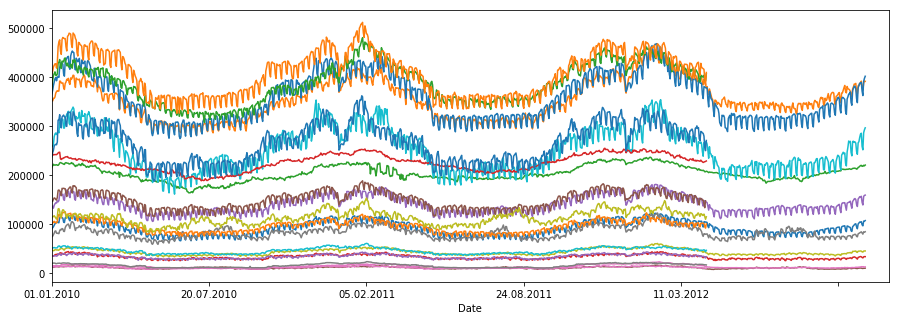

In [26]:
for i in np.arange(1, 23):
    ts[i]['ACTUAL'].plot(figsize=(15,5))

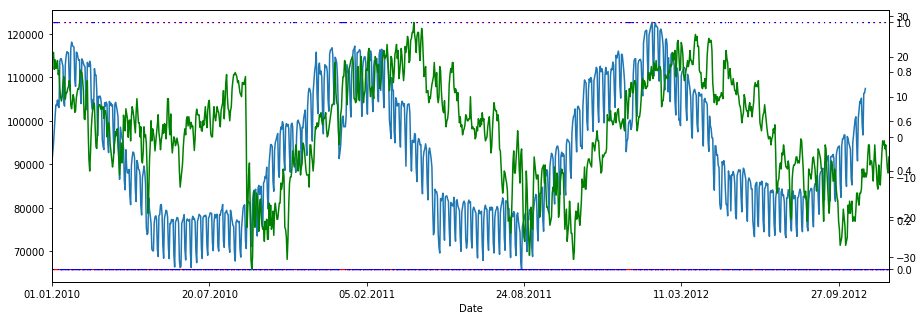

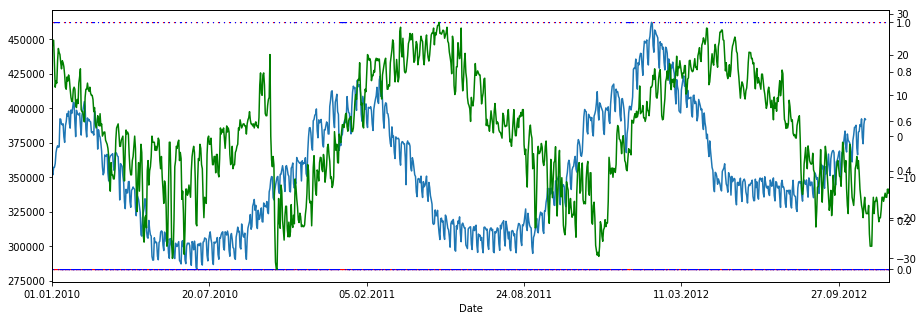

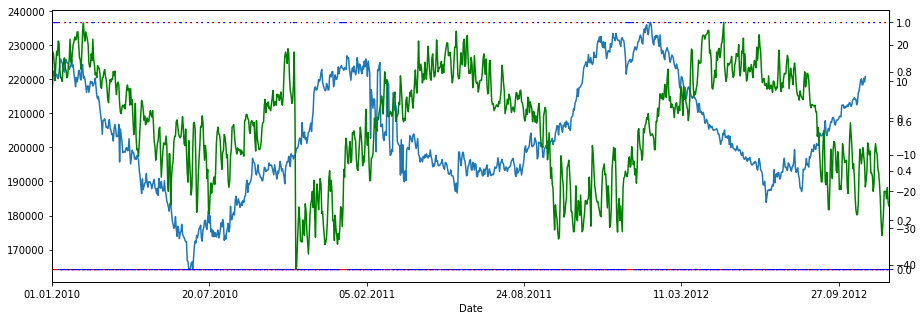

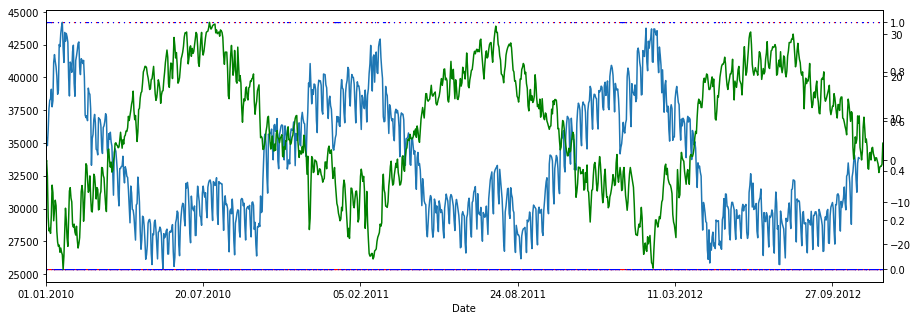

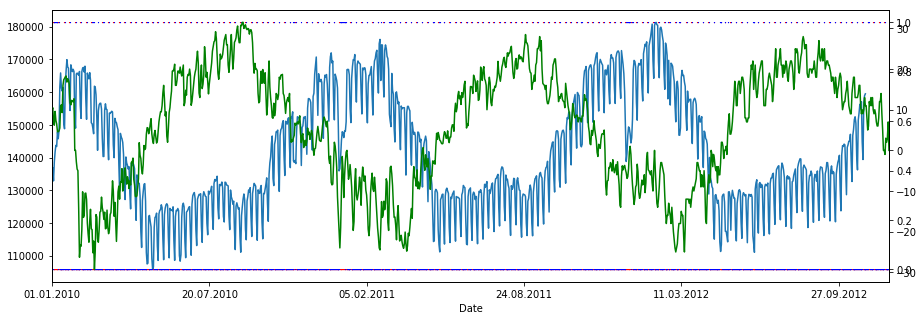

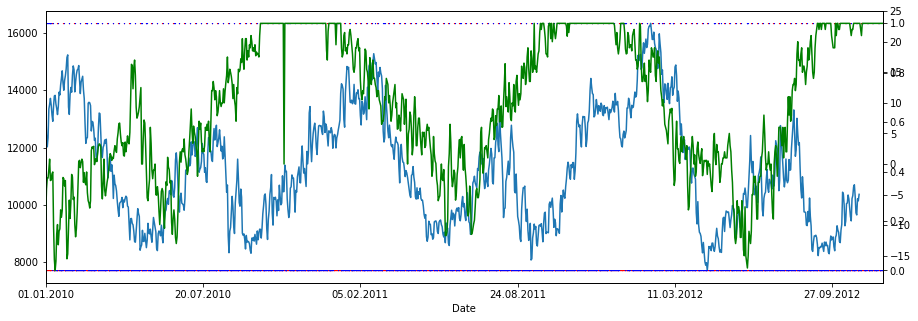

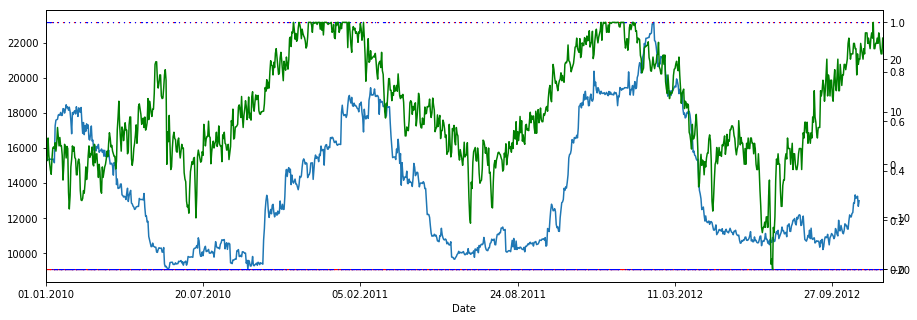

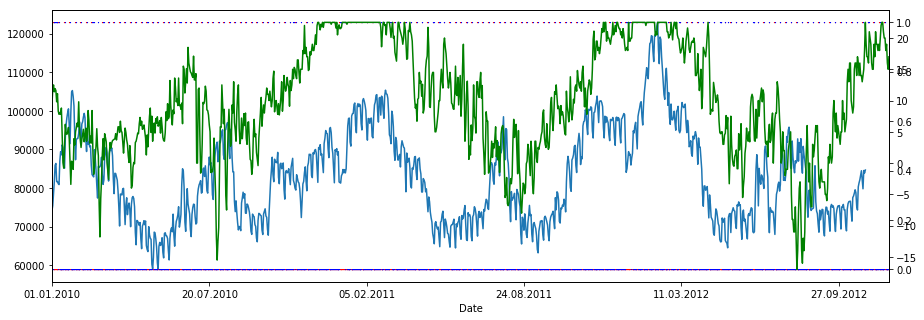

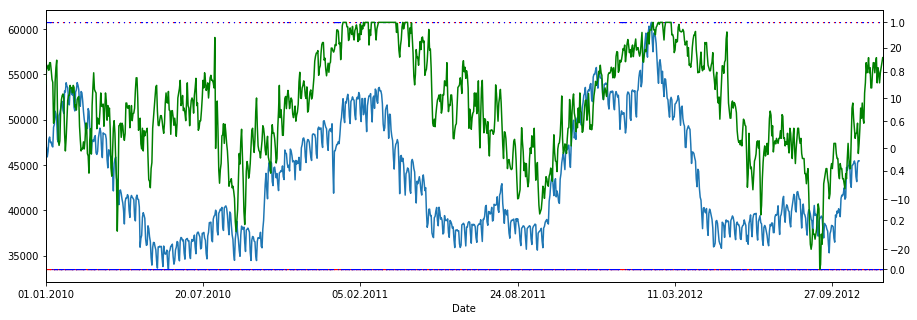

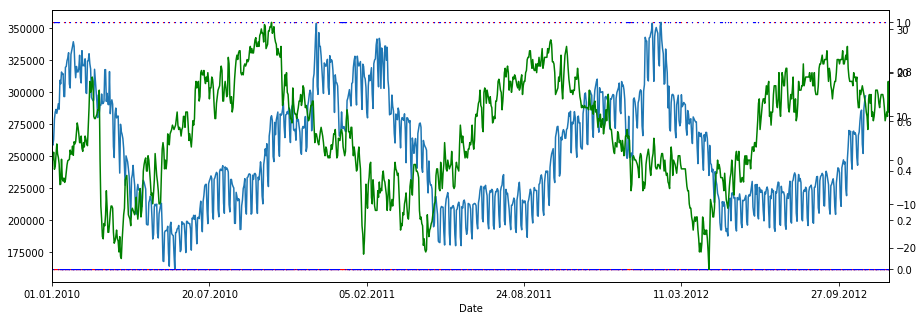

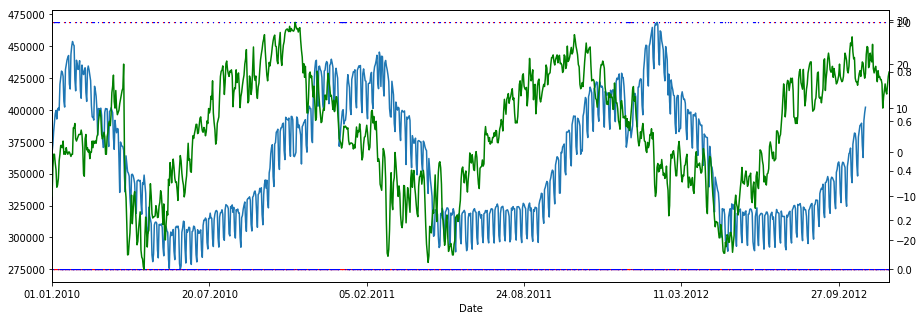

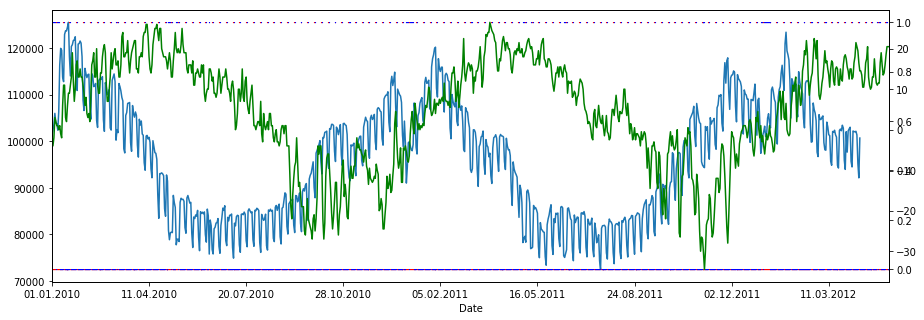

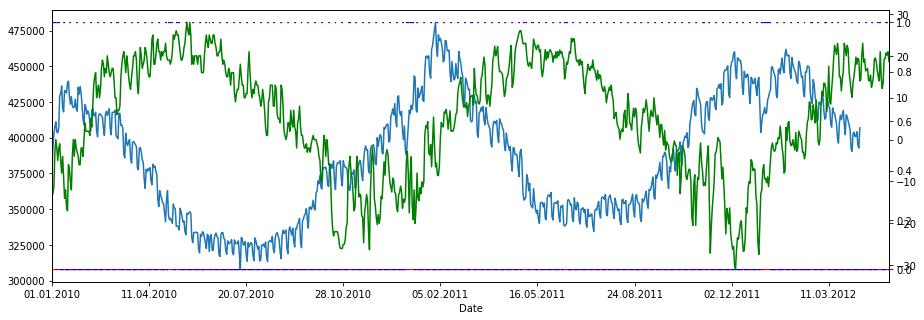

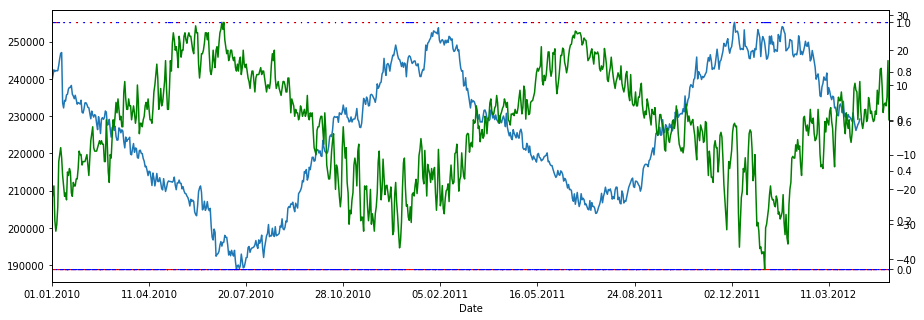

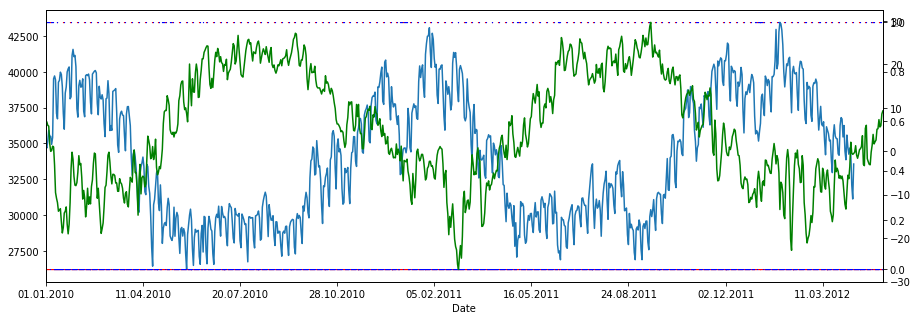

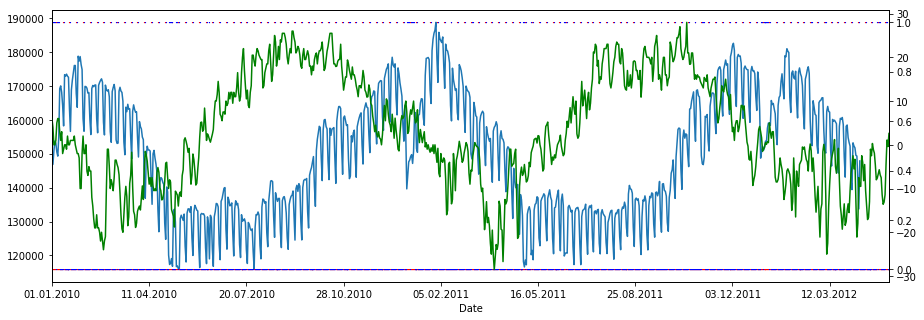

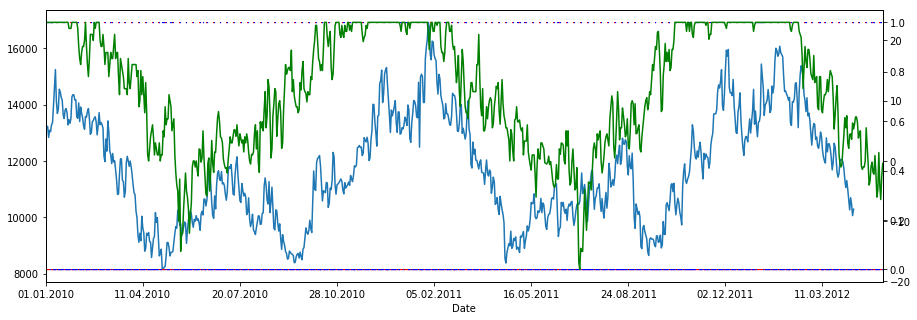

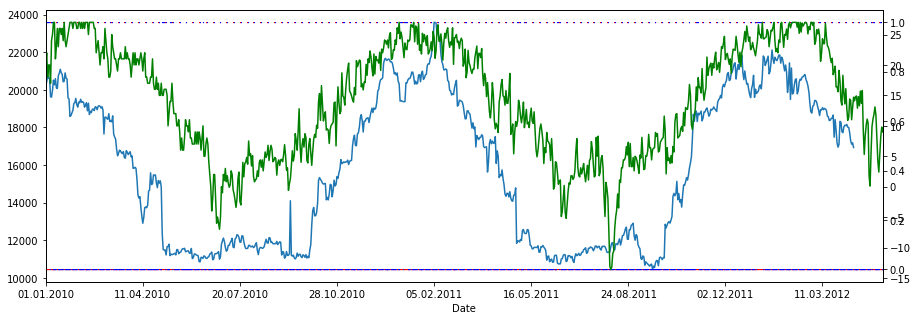

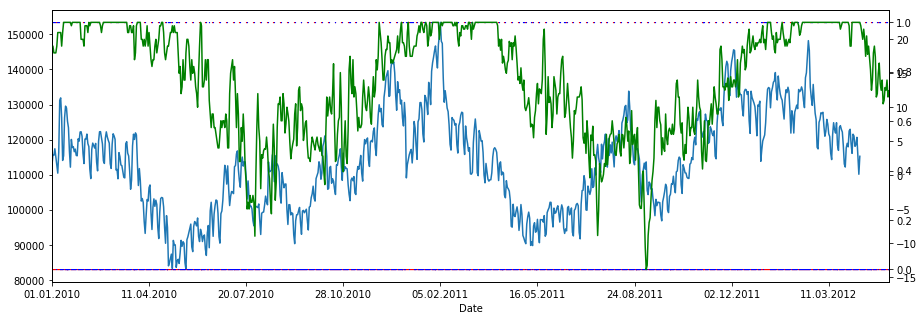

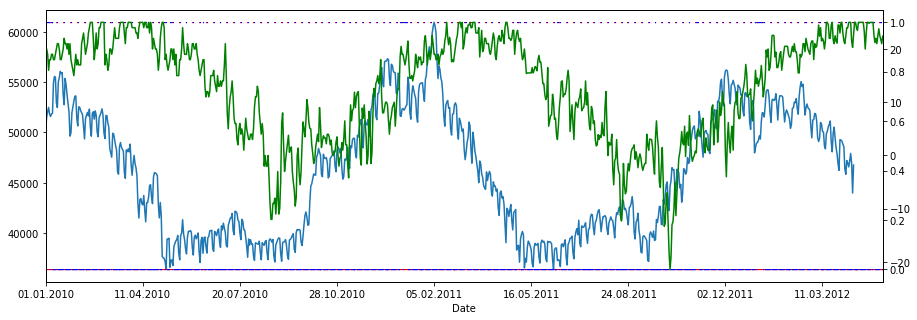

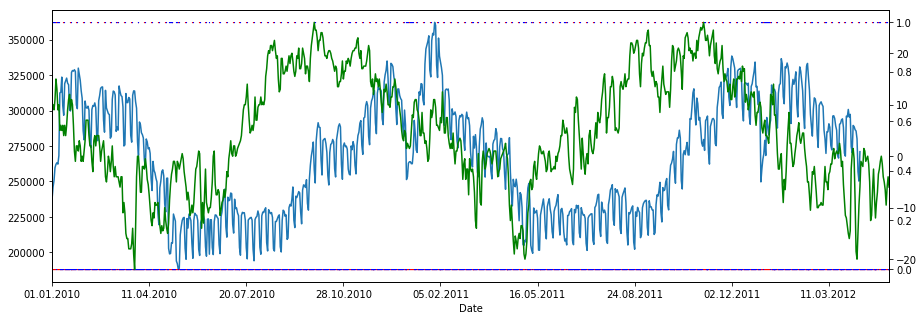

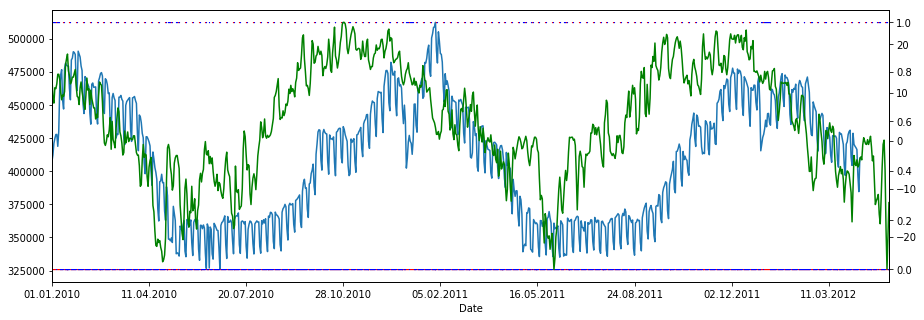

In [49]:
for i in np.arange(1, 23):
    figure, ax = plt.subplots(figsize=(15,5))
    ax2, ax3 = ax.twinx(), ax.twinx()
    ts[i]['ACTUAL'].plot(ax=ax, figsize=(15,5))
    ts[i]['Saturday'].plot(ax=ax2, style='r', marker = '^', markersize=0.5, linewidth=0.0)
    ts[i]['Sunday'].plot(ax=ax2, style='b', marker = '^', markersize=0.5, linewidth=0.0)
    ts[i]['Temp'].plot(ax=ax3, color='green')
    plt.show()

In [80]:
# save forecast to disk for further submission
final_forecast.save('result.csv', format='csv')